# Data Set

In [1]:
import pandas as pd
df=pd.read_csv('Data_lwf.csv') 
df

,Application,Length(mm),Width(um),Frequency(MHz),Power(nWatts)
0,1,1.0,0.10,128.000,349.40000
1,1,1.0,0.25,128.000,196.10000
2,1,1.0,0.40,128.000,142.80000
3,1,1.0,0.80,128.000,95.18000
4,1,1.0,1.00,128.000,82.37000
...,...,...,...,...,...
278,5,2.5,1.00,2.083,0.93920
279,5,5.0,1.00,2.083,5.35400
280,6,1.0,1.00,1.000,0.02154
281,6,2.5,1.00,1.000,0.22000


In [2]:
df=df.drop('Application', axis='columns')

## Data Analysis

#### 1. Underatanding Input-Output Relation

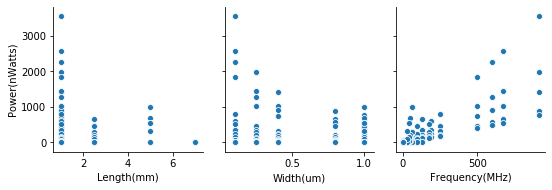

In [3]:
import numpy as np
import seaborn as sns
sns.pairplot(df, x_vars=["Length(mm)", "Width(um)", "Frequency(MHz)"], y_vars=["Power(nWatts)"])


#### 2. Heatmap

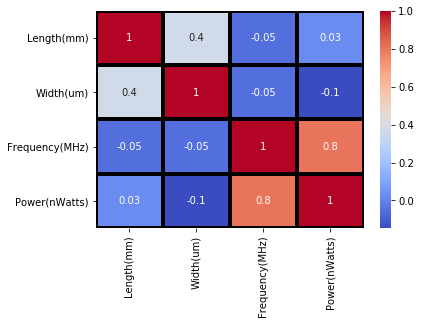

In [4]:
corr = df.corr(method = 'pearson')
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, annot = True, fmt='.1g', cmap= 'coolwarm',linewidths=3, linecolor='black')

## Parameters Description

#### 1. Output Power(nWatts)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print ("Mean: ",df['Power(nWatts)'].mean())
print ("Median: ",df['Power(nWatts)'].median())
print ("Mode: ",df['Power(nWatts)'].mode())
print ("Minimum: ",df['Power(nWatts)'].min())
print ("Maximum: ",df['Power(nWatts)'].max())
print ("Variance: ",df['Power(nWatts)'].var(),2)
print ("std: ",df['Power(nWatts)'].std(),2)
print ("range: ",df['Power(nWatts)'].max()-df['Power(nWatts)'].min())
print ("skewness: ",round(df['Power(nWatts)'].skew(),2))
print ("kurtosis: ",round(df['Power(nWatts)'].kurt(),2))



Mean:  146.28512674183511
Median:  0.5924
Mode:  0    0.003521
1    0.003904
2    0.005417
3    0.007181
4    0.012590
dtype: float64
Minimum:  1.3400000000000001e-08
Maximum:  3549.0
Variance:  158771.61570556165 2
std:  398.4615611392919 2
range:  3548.9999999866
skewness:  4.76
kurtosis:  28.4


In [6]:
df['Power(nWatts)'].skew()


4.762501242771105

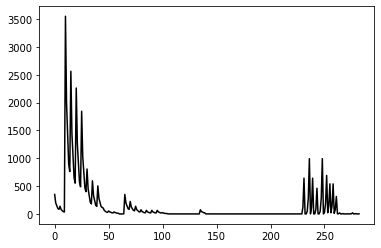

In [7]:
plt.plot(df['Power(nWatts)'], color = "Black")

#### 2. Input Parameters

##### 1. Length(mm)

In [8]:
df['Length(mm)'].skew()

3.129363449761528

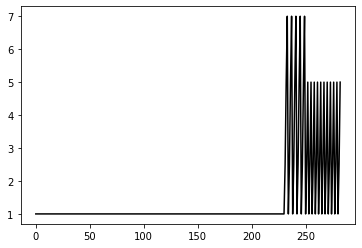

In [9]:
plt.plot(df['Length(mm)'], color = "Black")

##### 2. Width (um)

In [10]:
df['Width(um)'].skew()

-0.12045467032274146

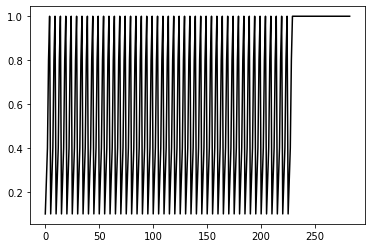

In [11]:
plt.plot(df['Width(um)'], color = "Black")

##### 3. Frequency(MHz) 

In [12]:
df['Frequency(MHz)'].skew()

3.1949268718269095

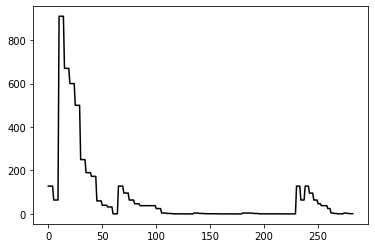

In [13]:
plt.plot(df['Frequency(MHz)'], color = "Black")

## Normalization

#### Applying Min-Max Scalar to scale the data in 0-1 range

In [14]:
df=pd.read_csv('Data_lwf.csv')
df=df.drop('Application', axis='columns')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df = pd.DataFrame(scaler.fit_transform(df),
                   columns=['Length(mm)','Width(um)', 'Frequency(MHz)', 'Power(nWatts)'])
df

,Length(mm),Width(um),Frequency(MHz),Power(nWatts)
0,0.000000,0.000000,0.140658,0.098450
1,0.000000,0.166667,0.140658,0.055255
2,0.000000,0.333333,0.140658,0.040237
3,0.000000,0.777778,0.140658,0.026819
4,0.000000,1.000000,0.140658,0.023209
...,...,...,...,...
278,0.250000,1.000000,0.002288,0.000265
279,0.666667,1.000000,0.002288,0.001509
280,0.000000,1.000000,0.001098,0.000006
281,0.250000,1.000000,0.001098,0.000062


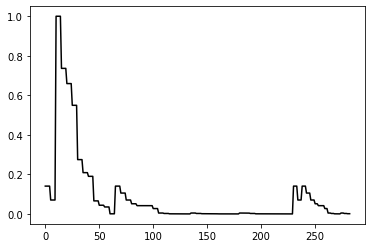

In [15]:
plt.plot(df['Frequency(MHz)'], color = "Black")

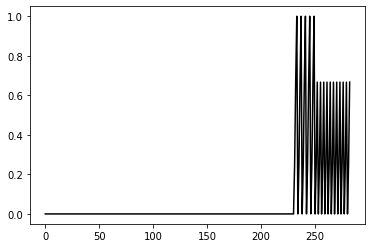

In [16]:
plt.plot(df['Length(mm)'], color = "Black")

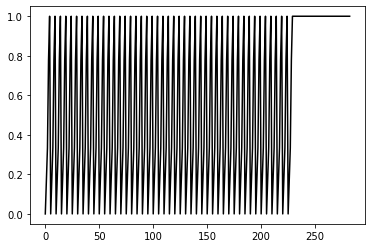

In [17]:
plt.plot(df['Width(um)'], color = "Black")

## Initialising Data Frame for Error Metrics

In [18]:
df1=pd.read_csv('Error_Metrics.csv')

df1.set_index("Technique", inplace = True)


## 80-20 Train_Test Split

#### Randomley splitting the whole data in the ratio 80:20 for Train_Data:Test_Date

In [19]:
X = df.drop('Power(nWatts)',axis='columns')
y = df['Power(nWatts)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
y_test

106    1.154691e-04
75     3.882784e-02
48     8.968724e-03
16     4.043393e-01
56     6.745562e-03
134    0.000000e+00
277    2.587489e-05
119    9.921067e-07
245    7.804978e-07
65     9.845027e-02
35     1.674838e-01
178    4.078895e-10
20     6.367991e-01
47     1.286560e-02
70     6.303184e-02
218    4.197988e-08
181    1.154691e-04
252    1.948154e-01
127    3.487349e-09
282    3.629191e-04
105    2.025923e-04
192    2.347985e-05
41     7.889546e-02
5      3.882784e-02
150    9.971819e-06
254    4.051846e-02
125    8.097098e-09
53     5.717103e-03
190    5.398703e-05
111    3.099464e-05
189    4.877430e-05
86     1.042829e-02
241    1.052969e-06
92     7.785292e-03
232    5.945299e-07
31     1.265145e-01
74     1.558749e-02
199    9.921067e-07
9      9.923922e-03
270    9.295576e-05
222    3.487349e-09
217    5.640648e-08
264    5.280361e-03
156    2.023383e-06
82     8.963088e-03
147    5.525496e-06
138    6.277825e-03
87     7.788109e-03
39     3.815159e-02
221    4.600338e-09


### Importing cross-Validation libraries

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

## Individual Machine Learning techniques:

#### Declaring error metrics list for storing error output

In [21]:
MAE = []  # Mean Absolute Error

MSE = []  # Mean Squared Error

RMSE = [] # Root Mean Squared Error

RRMSE = []# Relative Root Mean Squared Error

R = []    # Correlation Co-efficient
R2 = []

MAPE = [] # Mean Absolute Percentage Error

SMAPE = []# Symmetric Mean Absolute Percentage Error

SCORE = []# Accuracy

### 1. Linear Regression

In [22]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr
from sklearn import svm
from statistics import stdev
from sklearn.linear_model import LinearRegression

############ Error Definitions ############
### MAPE
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
### SMAPE
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))


########## Kfold Cross Validation #######################
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# create model
model = LinearRegression()
# evaluate model
scores = cross_val_score(model, X_train,y_train, cv=cv, n_jobs=None)
# report performance
print('Training Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


########### Testing Model ################################
rfe = RFE(model, n_features_to_select=3)             
hyper_params = [{'n_features_to_select':list(range(1,4))}]
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = cv, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 
y_predicted = model_cv.predict(X_test)

### Error Metrics ###
value_mae= metrics.mean_absolute_error(y_test, y_predicted) #MAE
MAE.append(value_mae)
    
value_mse= metrics.mean_squared_error(y_test, y_predicted) #MSE 
MSE.append(value_mse)
    
value_rmse= np.sqrt(metrics.mean_squared_error(y_test, y_predicted)) #RMSE 
RMSE.append(value_rmse)
   
value_rrmse= (np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))/(np.std(y_predicted)) #RRMSE 
RRMSE.append(value_rrmse)
   
corr, _ = pearsonr(y_test, y_predicted) #R 
value_r= corr 
R.append(value_r)

value_r2= metrics.r2_score(y_test, y_predicted) 
R2.append(value_r2)
  
value_mape = mean_absolute_percentage_error(y_test, y_predicted)
MAPE.append(value_mape)
    
value_smape = smape(y_test, y_predicted)
SMAPE.append(value_smape)

value_score = model_cv.score(X_test,y_test)
SCORE.append(value_score)



print ("Accuracy : ", sum(SCORE) / len(SCORE))
print ("Average MAE : ", sum(MAE) / len(MAE))
print ("Average MSE : ", sum(MSE) / len(MSE))
print ("Average RMSE : ", sum(RMSE) / len(RMSE))
print ("Average RRMSE : ", sum(RRMSE) / len(RRMSE))
print ("Average R : ", sum(R) / len(R))
print ("Average R2 : ", sum(R2) / len(R2))
print ("Average MAPE : ", sum(MAPE) / len(MAPE))
print ("Average SMAPE : ", sum(SMAPE) / len(SMAPE))
 

Training Accuracy: 0.482 (0.310)
Fitting 50 folds for each of 3 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy :  0.706992587113461
Average MAE :  0.02149012293368482
Average MSE :  0.003101916180653795
Average RMSE :  0.05569484878023995
Average RRMSE :  0.9127358235737257
Average R :  0.8948818353589512
Average R2 :  0.706992587113461
Average MAPE :  1703070.107771473
Average SMAPE :  133.06796607989352


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.2s finished


In [23]:

df1.loc['Linear_Regression', 'MAE'] = sum(MAE) / len(MAE)
df1.loc['Linear_Regression', 'MSE'] = sum(MSE) / len(MSE)
df1.loc['Linear_Regression', 'RMSE'] = sum(RMSE) / len(RMSE)
df1.loc['Linear_Regression', 'RRMSE'] = sum(RRMSE) / len(RRMSE)
df1.loc['Linear_Regression', 'R'] = sum(R) / len(R)
df1.loc['Linear_Regression', 'R2'] = sum(R2) / len(R2)
df1.loc['Linear_Regression', 'MAPE'] = sum(MAPE) / len(MAPE)
df1.loc['Linear_Regression', 'SMAPE'] = sum(SMAPE) / len(SMAPE)
df1.loc['Linear_Regression', 'Training_Score'] = mean(scores)
df1.loc['Linear_Regression', 'Testing_Score'] = sum(SCORE) / len(SCORE)
df1


,MAE,MSE,RMSE,RRMSE,R,R2,MAPE,SMAPE,Training_Score,Testing_Score
Technique,,,,,,,,,,
Linear_Regression,0.02149,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.482162,0.706993
SVM_Linear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVM_Quadratic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVM_Cubic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPR_Exponential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bagging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdaBoost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gradiant_Boosting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
MAE = []
MSE = []
RMSE = []
RRMSE = []
R = []
R2 = []
MAPE = []
SMAPE = []
SCORE = []

### SVM Linear

In [25]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr
from sklearn import svm
from statistics import stdev


############ Error Definitions ############
### MAPE
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
### SMAPE
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))


##### Kfold Cross Validation ##############
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# create model
model = svm.SVR(kernel='linear')
# evaluate model
scores = cross_val_score(model, X_train,y_train, cv=cv, n_jobs=None)
print('Training Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


#######  Model Fitting ###########
rfe = RFE(model, n_features_to_select=3)             
hyper_params = [{'n_features_to_select':list(range(1,4))}]
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = cv, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, y_train) 

###### Error Metrics ###############
value_mae= metrics.mean_absolute_error(y_test, y_predicted) #MAE
MAE.append(value_mae)
    
value_mse= metrics.mean_squared_error(y_test, y_predicted) #MSE 
MSE.append(value_mse)
    
value_rmse= np.sqrt(metrics.mean_squared_error(y_test, y_predicted)) #RMSE 
RMSE.append(value_rmse)
   
value_rrmse= (np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))/(np.std(y_predicted)) #RRMSE 
RRMSE.append(value_rrmse)
   
corr, _ = pearsonr(y_test, y_predicted) #R 
value_r= corr 
R.append(value_r)

value_r2= metrics.r2_score(y_test, y_predicted) 
R2.append(value_r2)
  
value_mape = mean_absolute_percentage_error(y_test, y_predicted)
MAPE.append(value_mape)
    
value_smape = smape(y_test, y_predicted)
SMAPE.append(value_smape)

value_score = model_cv.score(X_test,y_test)
SCORE.append(value_score)

print ("Accuracy : ", sum(SCORE) / len(SCORE))
print ("Average MAE : ", sum(MAE) / len(MAE))
print ("Average MSE : ", sum(MSE) / len(MSE))
print ("Average RMSE : ", sum(RMSE) / len(RMSE))
print ("Average RRMSE : ", sum(RRMSE) / len(RRMSE))
print ("Average R : ", sum(R) / len(R))
print ("Average R2 : ", sum(R2) / len(R2))
print ("Average MAPE : ", sum(MAPE) / len(MAPE))
print ("Average SMAPE : ", sum(SMAPE) / len(SMAPE))

Training Accuracy: 0.148 (0.560)
Fitting 50 folds for each of 3 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy :  0.46831262180134736
Average MAE :  0.02149012293368482
Average MSE :  0.003101916180653795
Average RMSE :  0.05569484878023995
Average RRMSE :  0.9127358235737257
Average R :  0.8948818353589512
Average R2 :  0.706992587113461
Average MAPE :  1703070.107771473
Average SMAPE :  133.06796607989352


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


In [26]:

df1.loc['SVM_Linear', 'MAE'] = sum(MAE) / len(MAE)
df1.loc['SVM_Linear', 'MSE'] = sum(MSE) / len(MSE)
df1.loc['SVM_Linear', 'RMSE'] = sum(RMSE) / len(RMSE)
df1.loc['SVM_Linear', 'RRMSE'] = sum(RRMSE) / len(RRMSE)
df1.loc['SVM_Linear', 'R'] = sum(R) / len(R)
df1.loc['SVM_Linear', 'R2'] = sum(R2) / len(R2)
df1.loc['SVM_Linear', 'MAPE'] = sum(MAPE) / len(MAPE)
df1.loc['SVM_Linear', 'SMAPE'] = sum(SMAPE) / len(SMAPE)
df1.loc['SVM_Linear', 'Training_Score'] = mean(scores)
df1.loc['SVM_Linear', 'Testing_Score'] = sum(SCORE) / len(SCORE)
df1


,MAE,MSE,RMSE,RRMSE,R,R2,MAPE,SMAPE,Training_Score,Testing_Score
Technique,,,,,,,,,,
Linear_Regression,0.02149,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.482162,0.706993
SVM_Linear,0.02149,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.148176,0.468313
SVM_Quadratic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVM_Cubic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPR_Exponential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bagging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdaBoost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gradiant_Boosting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:

MAE = []
MSE = []
RMSE = []
RRMSE = []
R = []
R2 = []
MAPE = []
SMAPE = []
SCORE = []

### 2. SVM_Quadratic

In [28]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr
from sklearn import svm
from statistics import stdev


############ Error Definitions ############
### MAPE
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
### SMAPE
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))


##### K fold cross Validation ###########
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# create model
model = svm.SVR(kernel='poly', degree=2)
# evaluate model
scores = cross_val_score(model, X_train,y_train, cv=cv, n_jobs=None)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

###### Model Fitting ######
rfe = RFE(estimator=model, n_features_to_select=3)             
hyper_params = [{'n_features_to_select':list(range(1,4))}]
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = cv, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, y_train) 

###### Error Metrics ###############
value_mae= metrics.mean_absolute_error(y_test, y_predicted) #MAE
MAE.append(value_mae)
    
value_mse= metrics.mean_squared_error(y_test, y_predicted) #MSE 
MSE.append(value_mse)
    
value_rmse= np.sqrt(metrics.mean_squared_error(y_test, y_predicted)) #RMSE 
RMSE.append(value_rmse)
   
value_rrmse= (np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))/(np.std(y_predicted)) #RRMSE 
RRMSE.append(value_rrmse)
   
corr, _ = pearsonr(y_test, y_predicted) #R 
value_r= corr 
R.append(value_r)

value_r2= metrics.r2_score(y_test, y_predicted) 
R2.append(value_r2)
  
value_mape = mean_absolute_percentage_error(y_test, y_predicted)
MAPE.append(value_mape)
    
value_smape = smape(y_test, y_predicted)
SMAPE.append(value_smape)

value_score = model_cv.score(X_test,y_test)
SCORE.append(value_score)

print ("Accuracy : ", sum(SCORE) / len(SCORE))
print ("Average MAE : ", sum(MAE) / len(MAE))
print ("Average MSE : ", sum(MSE) / len(MSE))
print ("Average RMSE : ", sum(RMSE) / len(RMSE))
print ("Average RRMSE : ", sum(RRMSE) / len(RRMSE))
print ("Average R : ", sum(R) / len(R))
print ("Average R2 : ", sum(R2) / len(R2))
print ("Average MAPE : ", sum(MAPE) / len(MAPE))
print ("Average SMAPE : ", sum(SMAPE) / len(SMAPE))

Accuracy: -0.237 (0.960)
Fitting 50 folds for each of 3 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy :  0.2527423111349023
Average MAE :  0.02149012293368482
Average MSE :  0.003101916180653795
Average RMSE :  0.05569484878023995
Average RRMSE :  0.9127358235737257
Average R :  0.8948818353589512
Average R2 :  0.706992587113461
Average MAPE :  1703070.107771473
Average SMAPE :  133.06796607989352


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished


In [29]:

df1.loc['SVM_Quadratic', 'MAE'] = sum(MAE) / len(MAE)
df1.loc['SVM_Quadratic', 'MSE'] = sum(MSE) / len(MSE)
df1.loc['SVM_Quadratic', 'RMSE'] = sum(RMSE) / len(RMSE)
df1.loc['SVM_Quadratic', 'RRMSE'] = sum(RRMSE) / len(RRMSE)
df1.loc['SVM_Quadratic', 'R'] = sum(R) / len(R)
df1.loc['SVM_Quadratic', 'R2'] = sum(R2) / len(R2)
df1.loc['SVM_Quadratic', 'MAPE'] = sum(MAPE) / len(MAPE)
df1.loc['SVM_Quadratic', 'SMAPE'] = sum(SMAPE) / len(SMAPE)
df1.loc['SVM_Quadratic', 'Training_Score'] = mean(scores)
df1.loc['SVM_Quadratic', 'Testing_Score'] = sum(SCORE) / len(SCORE)
df1


,MAE,MSE,RMSE,RRMSE,R,R2,MAPE,SMAPE,Training_Score,Testing_Score
Technique,,,,,,,,,,
Linear_Regression,0.02149,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.482162,0.706993
SVM_Linear,0.02149,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.148176,0.468313
SVM_Quadratic,0.02149,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,-0.237209,0.252742
SVM_Cubic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPR_Exponential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bagging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdaBoost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gradiant_Boosting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:

MAE = []
MSE = []
RMSE = []
RRMSE = []
R = []
R2 = []
MAPE = []
SMAPE = []
SCORE = []

### 4. SVM_Cubic:

In [31]:




from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr
from sklearn import svm
from statistics import stdev


############ Error Definitions ############
### MAPE
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
### SMAPE
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))


##### Kfold Cross Validation ####
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# create model
model = svm.SVR(kernel='poly', degree=3)
# evaluate model
scores = cross_val_score(model, X_train,y_train, cv=cv, n_jobs=None)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# Model Fitting
rfe = RFE(model, n_features_to_select=3)             
hyper_params = [{'n_features_to_select':list(range(1,4))}]
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = cv, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, y_train) 
y_predicted = model_cv.predict(X_test)

##### Error Metrics ###############
value_mae= metrics.mean_absolute_error(y_test, y_predicted) #MAE
MAE.append(value_mae)
    
value_mse= metrics.mean_squared_error(y_test, y_predicted) #MSE 
MSE.append(value_mse)
    
value_rmse= np.sqrt(metrics.mean_squared_error(y_test, y_predicted)) #RMSE 
RMSE.append(value_rmse)
   
value_rrmse= (np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))/(np.std(y_predicted)) #RRMSE 
RRMSE.append(value_rrmse)
   
corr, _ = pearsonr(y_test, y_predicted) #R 
value_r= corr 
R.append(value_r)

value_r2= metrics.r2_score(y_test, y_predicted) 
R2.append(value_r2)
  
value_mape = mean_absolute_percentage_error(y_test, y_predicted)
MAPE.append(value_mape)
    
value_smape = smape(y_test, y_predicted)
SMAPE.append(value_smape)

value_score = model_cv.score(X_test,y_test)
SCORE.append(value_score)

print ("Accuracy : ", sum(SCORE) / len(SCORE))
print ("Average MAE : ", sum(MAE) / len(MAE))
print ("Average MSE : ", sum(MSE) / len(MSE))
print ("Average RMSE : ", sum(RMSE) / len(RMSE))
print ("Average RRMSE : ", sum(RRMSE) / len(RRMSE))
print ("Average R : ", sum(R) / len(R))
print ("Average R2 : ", sum(R2) / len(R2))
print ("Average MAPE : ", sum(MAPE) / len(MAPE))
print ("Average SMAPE : ", sum(SMAPE) / len(SMAPE))

Accuracy: -0.155 (0.897)
Fitting 50 folds for each of 3 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy :  0.19922804551234197
Average MAE :  0.08352805517017553
Average MSE :  0.008477353723473474
Average RMSE :  0.09207254598127215
Average RRMSE :  2.0067785395802114
Average R :  0.8701584957605544
Average R2 :  0.19922804551234197
Average MAPE :  760192878.5215878
Average SMAPE :  160.078468868499


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


In [32]:

df1.loc['SVM_Cubic', 'MAE'] = sum(MAE) / len(MAE)
df1.loc['SVM_Cubic', 'MSE'] = sum(MSE) / len(MSE)
df1.loc['SVM_Cubic', 'RMSE'] = sum(RMSE) / len(RMSE)
df1.loc['SVM_Cubic', 'RRMSE'] = sum(RRMSE) / len(RRMSE)
df1.loc['SVM_Cubic', 'R'] = sum(R) / len(R)
df1.loc['SVM_Cubic', 'R2'] = sum(R2) / len(R2)
df1.loc['SVM_Cubic', 'MAPE'] = sum(MAPE) / len(MAPE)
df1.loc['SVM_Cubic', 'SMAPE'] = sum(SMAPE) / len(SMAPE)
df1.loc['SVM_Cubic', 'Training_Score'] = mean(scores)
df1.loc['SVM_Cubic', 'Testing_Score'] = sum(SCORE) / len(SCORE)
df1


,MAE,MSE,RMSE,RRMSE,R,R2,MAPE,SMAPE,Training_Score,Testing_Score
Technique,,,,,,,,,,
Linear_Regression,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.482162,0.706993
SVM_Linear,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.148176,0.468313
SVM_Quadratic,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,-0.237209,0.252742
SVM_Cubic,0.083528,0.008477,0.092073,2.006779,0.870158,0.199228,7.601929e+08,160.078469,-0.154729,0.199228
GPR_Exponential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bagging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdaBoost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gradiant_Boosting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
MAE = []
MSE = []
RMSE = []
RRMSE = []
R = []
R2 = []
MAPE = []
SMAPE = []
SCORE = []

### GPR with exponential Kernel

In [34]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr
from sklearn import svm
from statistics import stdev
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared


############ Error Definitions ############
### MAPE
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
### SMAPE
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))


##### Kfold Cross Validation #########
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# create model
kernel = ExpSineSquared(length_scale=1, periodicity=1)
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)

# evaluate model
scores = cross_val_score(model, X_train,y_train, cv=cv, n_jobs=None)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# Model Fitting
rfe = RFE(estimator = model, n_features_to_select=3)             
hyper_params = [{'n_features_to_select':list(range(1,4))}]
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = cv, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, y_train) 
y_predicted = model_cv.predict(X_test)

##### Error Metrics ###############
value_mae= metrics.mean_absolute_error(y_test, y_predicted) #MAE
MAE.append(value_mae)
    
value_mse= metrics.mean_squared_error(y_test, y_predicted) #MSE 
MSE.append(value_mse)
    
value_rmse= np.sqrt(metrics.mean_squared_error(y_test, y_predicted)) #RMSE 
RMSE.append(value_rmse)
   
value_rrmse= (np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))/(np.std(y_predicted)) #RRMSE 
RRMSE.append(value_rrmse)
   
corr, _ = pearsonr(y_test, y_predicted) #R 
value_r= corr 
R.append(value_r)

value_r2= metrics.r2_score(y_test, y_predicted) 
R2.append(value_r2)
  
value_mape = mean_absolute_percentage_error(y_test, y_predicted)
MAPE.append(value_mape)
    
value_smape = smape(y_test, y_predicted)
SMAPE.append(value_smape)

value_score = model_cv.score(X_test,y_test)
SCORE.append(value_score)

print ("Accuracy : ", sum(SCORE) / len(SCORE))
print ("Average MAE : ", sum(MAE) / len(MAE))
print ("Average MSE : ", sum(MSE) / len(MSE))
print ("Average RMSE : ", sum(RMSE) / len(RMSE))
print ("Average RRMSE : ", sum(RRMSE) / len(RRMSE))
print ("Average R : ", sum(R) / len(R))
print ("Average R2 : ", sum(R2) / len(R2))
print ("Average MAPE : ", sum(MAPE) / len(MAPE))
print ("Average SMAPE : ", sum(SMAPE) / len(SMAPE))

Accuracy: 0.519 (0.241)
Fitting 50 folds for each of 3 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   41.0s finished


Accuracy :  0.6787845297183527
Average MAE :  0.029801655939618754
Average MSE :  0.0034005401260233264
Average RMSE :  0.05831415030696517
Average RRMSE :  0.9689293088372533
Average R :  0.8730096851965194
Average R2 :  0.6787845297183527
Average MAPE :  99037672.0184059
Average SMAPE :  137.74374594043078


In [35]:
df1.loc['GPR_Exponential', 'MAE'] = sum(MAE) / len(MAE)
df1.loc['GPR_Exponential', 'MSE'] = sum(MSE) / len(MSE)
df1.loc['GPR_Exponential', 'RMSE'] = sum(RMSE) / len(RMSE)
df1.loc['GPR_Exponential', 'RRMSE'] = sum(RRMSE) / len(RRMSE)
df1.loc['GPR_Exponential', 'R'] = sum(R) / len(R)
df1.loc['GPR_Exponential', 'R2'] = sum(R2) / len(R2)
df1.loc['GPR_Exponential', 'MAPE'] = sum(MAPE) / len(MAPE)
df1.loc['GPR_Exponential', 'SMAPE'] = sum(SMAPE) / len(SMAPE)
df1.loc['GPR_Exponential', 'Training_Score'] = mean(scores)
df1.loc['GPR_Exponential', 'Testing_Score'] = sum(SCORE) / len(SCORE)
df1


,MAE,MSE,RMSE,RRMSE,R,R2,MAPE,SMAPE,Training_Score,Testing_Score
Technique,,,,,,,,,,
Linear_Regression,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.482162,0.706993
SVM_Linear,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.148176,0.468313
SVM_Quadratic,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,-0.237209,0.252742
SVM_Cubic,0.083528,0.008477,0.092073,2.006779,0.870158,0.199228,7.601929e+08,160.078469,-0.154729,0.199228
GPR_Exponential,0.029802,0.003401,0.058314,0.968929,0.873010,0.678785,9.903767e+07,137.743746,0.518977,0.678785
Bagging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdaBoost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gradiant_Boosting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
MAE = []
MSE = []
RMSE = []
RRMSE = []
R = []
R2 = []
MAPE = []
SMAPE = []
SCORE = []


# Advanced Ensemble techniques

## 3. Bagging

In [37]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr
from sklearn import svm
from statistics import stdev
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor


############ Error Definitions ############
### MAPE
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
### SMAPE
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))



cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# create model
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))

   
# evaluate model
scores = cross_val_score(model, X_train,y_train, cv=cv, n_jobs=None)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# fit the model
rfe = RFE(model, n_features_to_select=4)             
hyper_params = [{'n_features_to_select':list(range(1,4))}]
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = cv, 
                        verbose = 1,
                        return_train_score=True)      


model_cv.fit(X_train, y_train) 
y_predicted = model_cv.predict(X_test)

##### Error Metrics ###############
value_mae= metrics.mean_absolute_error(y_test, y_predicted) #MAE
MAE.append(value_mae)
    
value_mse= metrics.mean_squared_error(y_test, y_predicted) #MSE 
MSE.append(value_mse)
    
value_rmse= np.sqrt(metrics.mean_squared_error(y_test, y_predicted)) #RMSE 
RMSE.append(value_rmse)
   
value_rrmse= (np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))/(np.std(y_predicted)) #RRMSE 
RRMSE.append(value_rrmse)
   
corr, _ = pearsonr(y_test, y_predicted) #R 
value_r= corr 
R.append(value_r)

value_r2= metrics.r2_score(y_test, y_predicted) 
R2.append(value_r2)
  
value_mape = mean_absolute_percentage_error(y_test, y_predicted)
MAPE.append(value_mape)
    
value_smape = smape(y_test, y_predicted)
SMAPE.append(value_smape)

value_score = model_cv.score(X_test,y_test)
SCORE.append(value_score)

print ("Accuracy : ", sum(SCORE) / len(SCORE))
print ("Average MAE : ", sum(MAE) / len(MAE))
print ("Average MSE : ", sum(MSE) / len(MSE))
print ("Average RMSE : ", sum(RMSE) / len(RMSE))
print ("Average RRMSE : ", sum(RRMSE) / len(RRMSE))
print ("Average R : ", sum(R) / len(R))
print ("Average R2 : ", sum(R2) / len(R2))
print ("Average MAPE : ", sum(MAPE) / len(MAPE))
print ("Average SMAPE : ", sum(SMAPE) / len(SMAPE))

Accuracy: 0.821 (0.182)
Fitting 50 folds for each of 3 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy :  0.9774356721498232
Average MAE :  0.007048872867268069
Average MSE :  0.0002388767334399951
Average RMSE :  0.015455637594094756
Average RRMSE :  0.1572542968905486
Average R :  0.9893754009152559
Average R2 :  0.9774356721498232
Average MAPE :  424378.6203691953
Average SMAPE :  91.01625365580088


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.1s finished


In [38]:

df1.loc['Bagging', 'MAE'] = sum(MAE) / len(MAE)
df1.loc['Bagging', 'MSE'] = sum(MSE) / len(MSE)
df1.loc['Bagging', 'RMSE'] = sum(RMSE) / len(RMSE)
df1.loc['Bagging', 'RRMSE'] = sum(RRMSE) / len(RRMSE)
df1.loc['Bagging', 'R'] = sum(R) / len(R)
df1.loc['Bagging', 'R2'] = sum(R2) / len(R2)
df1.loc['Bagging', 'MAPE'] = sum(MAPE) / len(MAPE)
df1.loc['Bagging', 'SMAPE'] = sum(SMAPE) / len(SMAPE)
df1.loc['Bagging', 'Training_Score'] = mean(scores)
df1.loc['Bagging', 'Testing_Score'] = sum(SCORE) / len(SCORE)
df1


,MAE,MSE,RMSE,RRMSE,R,R2,MAPE,SMAPE,Training_Score,Testing_Score
Technique,,,,,,,,,,
Linear_Regression,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.482162,0.706993
SVM_Linear,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.148176,0.468313
SVM_Quadratic,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,-0.237209,0.252742
SVM_Cubic,0.083528,0.008477,0.092073,2.006779,0.870158,0.199228,7.601929e+08,160.078469,-0.154729,0.199228
GPR_Exponential,0.029802,0.003401,0.058314,0.968929,0.873010,0.678785,9.903767e+07,137.743746,0.518977,0.678785
Bagging,0.007049,0.000239,0.015456,0.157254,0.989375,0.977436,4.243786e+05,91.016254,0.821474,0.977436
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdaBoost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gradiant_Boosting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
MAE = []
MSE = []
RMSE = []
RRMSE = []
R = []
R2 = []
MAPE = []
SMAPE = []
SCORE = []


### 3.2 Random Forest

In [40]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr
from sklearn import svm
from statistics import stdev
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor


############ Error Definitions ############
### MAPE
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
### SMAPE
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))



cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# create model
model = RandomForestRegressor(n_estimators=230)

   
# evaluate model
scores = cross_val_score(model, X_train,y_train, cv=cv, n_jobs=None)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# specify model
#model.fit(X_train, y_train)
rfe = RFE(model, n_features_to_select=3)             
hyper_params = [{'n_features_to_select':list(range(1,4))}]
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = cv, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 
y_predicted = model_cv.predict(X_test)

##### Error Metrics ###############
value_mae= metrics.mean_absolute_error(y_test, y_predicted) #MAE
MAE.append(value_mae)
    
value_mse= metrics.mean_squared_error(y_test, y_predicted) #MSE 
MSE.append(value_mse)
    
value_rmse= np.sqrt(metrics.mean_squared_error(y_test, y_predicted)) #RMSE 
RMSE.append(value_rmse)
   
value_rrmse= (np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))/(np.std(y_predicted)) #RRMSE 
RRMSE.append(value_rrmse)
   
corr, _ = pearsonr(y_test, y_predicted) #R 
value_r= corr 
R.append(value_r)

value_r2= metrics.r2_score(y_test, y_predicted) 
R2.append(value_r2)
  
value_mape = mean_absolute_percentage_error(y_test, y_predicted)
MAPE.append(value_mape)
    
value_smape = smape(y_test, y_predicted)
SMAPE.append(value_smape)

value_score = model_cv.score(X_test,y_test)
SCORE.append(value_score)

print ("Accuracy : ", sum(SCORE) / len(SCORE))
print ("Average MAE : ", sum(MAE) / len(MAE))
print ("Average MSE : ", sum(MSE) / len(MSE))
print ("Average RMSE : ", sum(RMSE) / len(RMSE))
print ("Average RRMSE : ", sum(RRMSE) / len(RRMSE))
print ("Average R : ", sum(R) / len(R))
print ("Average R2 : ", sum(R2) / len(R2))
print ("Average MAPE : ", sum(MAPE) / len(MAPE))
print ("Average SMAPE : ", sum(SMAPE) / len(SMAPE))

Accuracy: 0.848 (0.151)
Fitting 50 folds for each of 3 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.2min finished


Accuracy :  0.9781442787308282
Average MAE :  0.006883586634091076
Average MSE :  0.00023137508630525748
Average RMSE :  0.015211018582108743
Average RRMSE :  0.15852662778165355
Average R :  0.9907544625494413
Average R2 :  0.9781442787308282
Average MAPE :  398341.08476709883
Average SMAPE :  93.41557765829732


In [41]:

df1.loc['Random Forest', 'MAE'] = sum(MAE) / len(MAE)
df1.loc['Random Forest', 'MSE'] = sum(MSE) / len(MSE)
df1.loc['Random Forest', 'RMSE'] = sum(RMSE) / len(RMSE)
df1.loc['Random Forest', 'RRMSE'] = sum(RRMSE) / len(RRMSE)
df1.loc['Random Forest', 'R'] = sum(R) / len(R)
df1.loc['Random Forest', 'R2'] = sum(R2) / len(R2)
df1.loc['Random Forest', 'MAPE'] = sum(MAPE) / len(MAPE)
df1.loc['Random Forest', 'SMAPE'] = sum(SMAPE) / len(SMAPE)
df1.loc['Random Forest', 'Training_Score'] = mean(scores)
df1.loc['Random Forest', 'Testing_Score'] = sum(SCORE) / len(SCORE)
df1


,MAE,MSE,RMSE,RRMSE,R,R2,MAPE,SMAPE,Training_Score,Testing_Score
Technique,,,,,,,,,,
Linear_Regression,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.482162,0.706993
SVM_Linear,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.148176,0.468313
SVM_Quadratic,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,-0.237209,0.252742
SVM_Cubic,0.083528,0.008477,0.092073,2.006779,0.870158,0.199228,7.601929e+08,160.078469,-0.154729,0.199228
GPR_Exponential,0.029802,0.003401,0.058314,0.968929,0.873010,0.678785,9.903767e+07,137.743746,0.518977,0.678785
Bagging,0.007049,0.000239,0.015456,0.157254,0.989375,0.977436,4.243786e+05,91.016254,0.821474,0.977436
Random Forest,0.006884,0.000231,0.015211,0.158527,0.990754,0.978144,3.983411e+05,93.415578,0.847694,0.978144
AdaBoost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gradiant_Boosting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
MAE = []
MSE = []
RMSE = []
RRMSE = []
R = []
R2 = []
MAPE = []
SMAPE = []
SCORE = []


## 4. Boosting Technique:

### 4.1 AdaBoost:

In [43]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr
from sklearn import svm
from statistics import stdev
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


############ Error Definitions ############
### MAPE
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
### SMAPE
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))



cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# create model
model = AdaBoostRegressor()

   
# evaluate model
scores = cross_val_score(model, X_train,y_train, cv=cv, n_jobs=None)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# specify model
#model.fit(X_train, y_train)
rfe = RFE(model, n_features_to_select=3)             
hyper_params = [{'n_features_to_select':list(range(1,4))}]
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = cv, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 
y_predicted = model_cv.predict(X_test)

##### Error Metrics ###############
value_mae= metrics.mean_absolute_error(y_test, y_predicted) #MAE
MAE.append(value_mae)
    
value_mse= metrics.mean_squared_error(y_test, y_predicted) #MSE 
MSE.append(value_mse)
    
value_rmse= np.sqrt(metrics.mean_squared_error(y_test, y_predicted)) #RMSE 
RMSE.append(value_rmse)
   
value_rrmse= (np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))/(np.std(y_predicted)) #RRMSE 
RRMSE.append(value_rrmse)
   
corr, _ = pearsonr(y_test, y_predicted) #R 
value_r= corr 
R.append(value_r)

value_r2= metrics.r2_score(y_test, y_predicted) 
R2.append(value_r2)
  
value_mape = mean_absolute_percentage_error(y_test, y_predicted)
MAPE.append(value_mape)
    
value_smape = smape(y_test, y_predicted)
SMAPE.append(value_smape)

value_score = model_cv.score(X_test,y_test)
SCORE.append(value_score)

print ("Accuracy : ", sum(SCORE) / len(SCORE))
print ("Average MAE : ", sum(MAE) / len(MAE))
print ("Average MSE : ", sum(MSE) / len(MSE))
print ("Average RMSE : ", sum(RMSE) / len(RMSE))
print ("Average RRMSE : ", sum(RRMSE) / len(RRMSE))
print ("Average R : ", sum(R) / len(R))
print ("Average R2 : ", sum(R2) / len(R2))
print ("Average MAPE : ", sum(MAPE) / len(MAPE))
print ("Average SMAPE : ", sum(SMAPE) / len(SMAPE))

Accuracy: 0.656 (0.193)
Fitting 50 folds for each of 3 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy :  0.8567199120568019
Average MAE :  0.023394177431337575
Average MSE :  0.0015168313278429114
Average RMSE :  0.03894651881545912
Average RRMSE :  0.4355646014315999
Average R :  0.9358319795188462
Average R2 :  0.8567199120568019
Average MAPE :  50616721.66839853
Average SMAPE :  133.94944034823885


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    4.2s finished


In [44]:


df1.loc['AdaBoost', 'MAE'] = sum(MAE) / len(MAE)
df1.loc['AdaBoost', 'MSE'] = sum(MSE) / len(MSE)
df1.loc['AdaBoost', 'RMSE'] = sum(RMSE) / len(RMSE)
df1.loc['AdaBoost', 'RRMSE'] = sum(RRMSE) / len(RRMSE)
df1.loc['AdaBoost', 'R'] = sum(R) / len(R)
df1.loc['AdaBoost', 'R2'] = sum(R2) / len(R2)
df1.loc['AdaBoost', 'MAPE'] = sum(MAPE) / len(MAPE)
df1.loc['AdaBoost', 'SMAPE'] = sum(SMAPE) / len(SMAPE)
df1.loc['AdaBoost', 'Training_Score'] = mean(scores)
df1.loc['AdaBoost', 'Testing_Score'] = sum(SCORE) / len(SCORE)
df1


,MAE,MSE,RMSE,RRMSE,R,R2,MAPE,SMAPE,Training_Score,Testing_Score
Technique,,,,,,,,,,
Linear_Regression,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.482162,0.706993
SVM_Linear,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.148176,0.468313
SVM_Quadratic,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,-0.237209,0.252742
SVM_Cubic,0.083528,0.008477,0.092073,2.006779,0.870158,0.199228,7.601929e+08,160.078469,-0.154729,0.199228
GPR_Exponential,0.029802,0.003401,0.058314,0.968929,0.873010,0.678785,9.903767e+07,137.743746,0.518977,0.678785
Bagging,0.007049,0.000239,0.015456,0.157254,0.989375,0.977436,4.243786e+05,91.016254,0.821474,0.977436
Random Forest,0.006884,0.000231,0.015211,0.158527,0.990754,0.978144,3.983411e+05,93.415578,0.847694,0.978144
AdaBoost,0.023394,0.001517,0.038947,0.435565,0.935832,0.856720,5.061672e+07,133.949440,0.655677,0.856720
Gradiant_Boosting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
MAE = []
MSE = []
RMSE = []
RRMSE = []
R = []
R2 = []
MAPE = []
SMAPE = []
SCORE = []


### 4.2 Gradient Boosting (GBM):

In [46]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr
from sklearn import svm
from statistics import stdev
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


############ Error Definitions ############
### MAPE
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
### SMAPE
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))



cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# create model
model =  GradientBoostingRegressor()

   
# evaluate model
scores = cross_val_score(model, X_train,y_train, cv=cv, n_jobs=None)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# specify model
#model.fit(X_train, y_train)
rfe = RFE(model, n_features_to_select=3)             
hyper_params = [{'n_features_to_select':list(range(1,4))}]
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = cv, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 
y_predicted = model_cv.predict(X_test)

##### Error Metrics ###############
value_mae= metrics.mean_absolute_error(y_test, y_predicted) #MAE
MAE.append(value_mae)
    
value_mse= metrics.mean_squared_error(y_test, y_predicted) #MSE 
MSE.append(value_mse)
    
value_rmse= np.sqrt(metrics.mean_squared_error(y_test, y_predicted)) #RMSE 
RMSE.append(value_rmse)
   
value_rrmse= (np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))/(np.std(y_predicted)) #RRMSE 
RRMSE.append(value_rrmse)
   
corr, _ = pearsonr(y_test, y_predicted) #R 
value_r= corr 
R.append(value_r)

value_r2= metrics.r2_score(y_test, y_predicted) 
R2.append(value_r2)
  
value_mape = mean_absolute_percentage_error(y_test, y_predicted)
MAPE.append(value_mape)
    
value_smape = smape(y_test, y_predicted)
SMAPE.append(value_smape)

value_score = model_cv.score(X_test,y_test)
SCORE.append(value_score)

print ("Accuracy : ", sum(SCORE) / len(SCORE))
print ("Average MAE : ", sum(MAE) / len(MAE))
print ("Average MSE : ", sum(MSE) / len(MSE))
print ("Average RMSE : ", sum(RMSE) / len(RMSE))
print ("Average RRMSE : ", sum(RRMSE) / len(RRMSE))
print ("Average R : ", sum(R) / len(R))
print ("Average R2 : ", sum(R2) / len(R2))
print ("Average MAPE : ", sum(MAPE) / len(MAPE))
print ("Average SMAPE : ", sum(SMAPE) / len(SMAPE))

Accuracy: 0.845 (0.158)
Fitting 50 folds for each of 3 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy :  0.9657996528053705
Average MAE :  0.009693577840613605
Average MSE :  0.0003620611823499455
Average RMSE :  0.019027905358970688
Average RRMSE :  0.1879867758441158
Average R :  0.9829356278922992
Average R2 :  0.9657996528053705
Average MAPE :  6000491.663940766
Average SMAPE :  123.69511564826554


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    7.7s finished


In [47]:
df1.loc['Gradiant_Boosting', 'MAE'] = sum(MAE) / len(MAE)
df1.loc['Gradiant_Boosting', 'MSE'] = sum(MSE) / len(MSE)
df1.loc['Gradiant_Boosting', 'RMSE'] = sum(RMSE) / len(RMSE)
df1.loc['Gradiant_Boosting', 'RRMSE'] = sum(RRMSE) / len(RRMSE)
df1.loc['Gradiant_Boosting', 'R'] = sum(R) / len(R)
df1.loc['Gradiant_Boosting', 'R2'] = sum(R2) / len(R2)
df1.loc['Gradiant_Boosting', 'MAPE'] = sum(MAPE) / len(MAPE)
df1.loc['Gradiant_Boosting', 'SMAPE'] = sum(SMAPE) / len(SMAPE)
df1.loc['Gradiant_Boosting', 'Training_Score'] = mean(scores)
df1.loc['Gradiant_Boosting', 'Testing_Score'] = sum(SCORE) / len(SCORE)

df1

,MAE,MSE,RMSE,RRMSE,R,R2,MAPE,SMAPE,Training_Score,Testing_Score
Technique,,,,,,,,,,
Linear_Regression,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.482162,0.706993
SVM_Linear,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.148176,0.468313
SVM_Quadratic,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,-0.237209,0.252742
SVM_Cubic,0.083528,0.008477,0.092073,2.006779,0.870158,0.199228,7.601929e+08,160.078469,-0.154729,0.199228
GPR_Exponential,0.029802,0.003401,0.058314,0.968929,0.873010,0.678785,9.903767e+07,137.743746,0.518977,0.678785
Bagging,0.007049,0.000239,0.015456,0.157254,0.989375,0.977436,4.243786e+05,91.016254,0.821474,0.977436
Random Forest,0.006884,0.000231,0.015211,0.158527,0.990754,0.978144,3.983411e+05,93.415578,0.847694,0.978144
AdaBoost,0.023394,0.001517,0.038947,0.435565,0.935832,0.856720,5.061672e+07,133.949440,0.655677,0.856720
Gradiant_Boosting,0.009694,0.000362,0.019028,0.187987,0.982936,0.965800,6.000492e+06,123.695116,0.845207,0.965800


### 4.3.  XG_Boost

In [78]:
MAE = []
MSE = []
RMSE = []
RRMSE = []
R = []
R2 = []
MAPE = []
SMAPE = []
SCORE = []

In [48]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr
from sklearn import svm
from statistics import stdev
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

############ Error Definitions ############
### MAPE
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
### SMAPE
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))



cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# create model
model =  xgb.XGBRegressor()

   
# evaluate model
scores = cross_val_score(model, X_train,y_train, cv=cv, n_jobs=None)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# specify model
#model.fit(X_train, y_train)
rfe = RFE(model, n_features_to_select=3)             
hyper_params = [{'n_features_to_select':list(range(1,4))}]
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = cv, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 
y_predicted = model_cv.predict(X_test)

##### Error Metrics ###############
value_mae= metrics.mean_absolute_error(y_test, y_predicted) #MAE
MAE.append(value_mae)
    
value_mse= metrics.mean_squared_error(y_test, y_predicted) #MSE 
MSE.append(value_mse)
    
value_rmse= np.sqrt(metrics.mean_squared_error(y_test, y_predicted)) #RMSE 
RMSE.append(value_rmse)
   
value_rrmse= (np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))/(np.std(y_predicted)) #RRMSE 
RRMSE.append(value_rrmse)
   
corr, _ = pearsonr(y_test, y_predicted) #R 
value_r= corr 
R.append(value_r)

value_r2= metrics.r2_score(y_test, y_predicted) 
R2.append(value_r2)
  
value_mape = mean_absolute_percentage_error(y_test, y_predicted)
MAPE.append(value_mape)
    
value_smape = smape(y_test, y_predicted)
SMAPE.append(value_smape)

value_score = model_cv.score(X_test,y_test)
SCORE.append(value_score)

print ("Accuracy : ", sum(SCORE) / len(SCORE))
print ("Average MAE : ", sum(MAE) / len(MAE))
print ("Average MSE : ", sum(MSE) / len(MSE))
print ("Average RMSE : ", sum(RMSE) / len(RMSE))
print ("Average RRMSE : ", sum(RRMSE) / len(RRMSE))
print ("Average R : ", sum(R) / len(R))
print ("Average R2 : ", sum(R2) / len(R2))
print ("Average MAPE : ", sum(MAPE) / len(MAPE))
print ("Average SMAPE : ", sum(SMAPE) / len(SMAPE))

Accuracy: 0.882 (0.166)
Fitting 50 folds for each of 3 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.9min finished


Accuracy :  0.9782328489726198
Average MAE :  0.006778512713533026
Average MSE :  0.0002304374394947855
Average RMSE :  0.014484206612626626
Average RRMSE :  0.13951038443060162
Average R :  0.9901728649013164
Average R2 :  0.9782328489726198
Average MAPE :  3481182.2776393057
Average SMAPE :  114.29978466692145


In [49]:
df1.loc['XG_Boost', 'MAE'] = sum(MAE) / len(MAE)
df1.loc['XG_Boost', 'MSE'] = sum(MSE) / len(MSE)
df1.loc['XG_Boost', 'RMSE'] = sum(RMSE) / len(RMSE)
df1.loc['XG_Boost', 'RRMSE'] = sum(RRMSE) / len(RRMSE)
df1.loc['XG_Boost', 'R'] = sum(R) / len(R)
df1.loc['XG_Boost', 'R2'] = sum(R2) / len(R2)
df1.loc['XG_Boost', 'MAPE'] = sum(MAPE) / len(MAPE)
df1.loc['XG_Boost', 'SMAPE'] = sum(SMAPE) / len(SMAPE)
df1.loc['XG_Boost', 'Training_Score'] = mean(scores)
df1.loc['XG_Boost', 'Testing_Score'] = sum(SCORE) / len(SCORE)


df1

,MAE,MSE,RMSE,RRMSE,R,R2,MAPE,SMAPE,Training_Score,Testing_Score
Technique,,,,,,,,,,
Linear_Regression,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.482162,0.706993
SVM_Linear,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,0.148176,0.468313
SVM_Quadratic,0.021490,0.003102,0.055695,0.912736,0.894882,0.706993,1.703070e+06,133.067966,-0.237209,0.252742
SVM_Cubic,0.083528,0.008477,0.092073,2.006779,0.870158,0.199228,7.601929e+08,160.078469,-0.154729,0.199228
GPR_Exponential,0.029802,0.003401,0.058314,0.968929,0.873010,0.678785,9.903767e+07,137.743746,0.518977,0.678785
Bagging,0.007049,0.000239,0.015456,0.157254,0.989375,0.977436,4.243786e+05,91.016254,0.821474,0.977436
Random Forest,0.006884,0.000231,0.015211,0.158527,0.990754,0.978144,3.983411e+05,93.415578,0.847694,0.978144
AdaBoost,0.023394,0.001517,0.038947,0.435565,0.935832,0.856720,5.061672e+07,133.949440,0.655677,0.856720
Gradiant_Boosting,0.009694,0.000362,0.019028,0.187987,0.982936,0.965800,6.000492e+06,123.695116,0.845207,0.965800


### Save all Error_metrics into a xlsx file

In [50]:

datatoexcel = pd.ExcelWriter('ElFILA_Error_Metrics.xlsx')
  

df1.to_excel(datatoexcel)
  

datatoexcel.save()
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


#### From the analysis of the obtained results, Gradient and Extra_Gradient boosting techniques outperforms other considered techniques. Hence Fine tune those two techniques to get the optimised results

## Gradiant and XG_Boost with FineTuning

#### Reading DataFrame of  Error Metrics for Fine Tuned techniques

In [51]:
import pandas as pd
df2=pd.read_csv('Errors_FT.csv') 

df2.set_index("Technique", inplace = True)

#### Selecting Best number of Folds for Gradient Boosting based on Accuracy

#### Applying Min-Max Scalar for data

In [85]:
import pandas as pd
df=pd.read_csv('Data_lwf.csv') 
df=df.drop('Application', axis='columns')

X = df.drop('Power(nWatts)',axis='columns')
y = df['Power(nWatts)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

df_y_test = pd.DataFrame(y_test)
df_ytest = pd.DataFrame(scaler.fit_transform(df_y_test),
                        columns=['Power(nWatts)'])
df_X_train = pd.DataFrame(X_train)
df_Xtrain= pd.DataFrame(scaler.fit_transform(df_X_train),
                        columns=['Length(mm)','Width(um)', 'Frequency(MHz)'])

df_X_test = pd.DataFrame(X_test)
df_Xtest =pd.DataFrame(scaler.fit_transform(df_X_test),
                        columns=['Length(mm)','Width(um)', 'Frequency(MHz)'])
df_y_train = pd.DataFrame(y_train)
df_ytrain =pd.DataFrame(scaler.fit_transform(df_y_train),
                        columns=['Power(nWatts)'])



#### Determining best hyper parameters for Gradient Boosting Technique

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

parameters = {
    "loss":["huber"],
    "learning_rate": [0.1, 0.15, 0.3],
    "min_samples_split": np.linspace(0.1, 0.5, 1),
    "min_samples_leaf": np.linspace(0.1, 0.5, 1),
    "max_depth":[3],
#    "subsample":[0.5, 0.75, 0.85, 1.0],
    "alpha": [0.25,0.5,0.75,0.9,0.95],
    "n_estimators":[1000]
    }

model1 = GridSearchCV(GradientBoostingRegressor(), parameters, cv=4)
model1.fit(df_Xtrain, df_ytrain)
print(model1.score(df_Xtest,df_ytest))
print(model1.best_estimator_.learning_rate)
print(model1.best_estimator_.min_samples_split)
print(model1.best_estimator_.min_samples_leaf)
print(model1.best_estimator_.alpha)

0.3286981645105862
0.15
0.1
0.1
0.75


#### Applying the best hyper parameters on Gradient boosting technique

In [70]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr
from sklearn import svm
from statistics import stdev
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor


############ Error Definitions ############
### MAPE
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
### SMAPE
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))


# create model
model_gb =  TransformedTargetRegressor(regressor= GradientBoostingRegressor(learning_rate=model1.best_estimator_.learning_rate,loss='huber', n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0
)
                                        )

# fit the model
model_gb.fit(df_Xtrain, df_ytrain) 
y_predicted_gb = model_gb.predict(df_Xtest)
y_predicted_gb = pd.DataFrame(y_predicted_gb)
value_mae= metrics.mean_absolute_error(df_ytest, y_predicted_gb) #MAE
value_mae
value_mse= metrics.mean_squared_error(df_ytest, y_predicted_gb) #MSE 
value_rmse= np.sqrt(metrics.mean_squared_error(df_ytest, y_predicted_gb)) #RMSE
value_rrmse= (np.sqrt(metrics.mean_squared_error(df_ytest, y_predicted_gb)))/(np.std(y_predicted_gb)) #RRMSE 


value_r2= metrics.r2_score(df_ytest, y_predicted_gb)

value_mape = mean_absolute_percentage_error(df_ytest, y_predicted_gb)

value_smape = smape(df_ytest, y_predicted_gb)
SCORE=[]
SCORE.append(model_gb.score(df_Xtest,df_ytest))
SCORE


[0.9391098347396597]

In [71]:
df2.loc['Gradiant_Boosting', 'MAE'] = value_mae
df2.loc['Gradiant_Boosting', 'RMSE'] = value_rmse
df2.loc['Gradiant_Boosting', 'R'] = value_r
df2

,MAE,RMSE,R
Technique,,,
Gradiant_Boosting,0.013417,0.042003,0.99741
XG_Boost,0.046870,0.116972,0.99741


## Extra Gradient Boost

#### Determining best hyper parameters for XG_ Boosting Technique

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
import xgboost as xgb

parameters = {
    "max_depth":[3, 5, 7],
    "learning_rate": [0.3, 0.45, 0.6, 0.8, 1],
    "n_estimators": [1000]
    }

model2 = GridSearchCV(xgb.XGBRegressor(), parameters, cv=5)
model2.fit(df_Xtrain, df_ytrain)
print(model2.score(df_Xtest,df_ytest))
print(model2.best_estimator_.learning_rate)
print(model2.best_estimator_.max_depth)


0.9952299966932071
0.3
3


#### Applying the best hyper parameters on XG boosting technique

In [87]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr
from sklearn import svm
from statistics import stdev
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

############ Error Definitions ############
### MAPE
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
### SMAPE
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))




model_xg =  TransformedTargetRegressor(regressor= xgb.XGBRegressor(learning_rate=model2.best_estimator_.learning_rate, max_depth= model2.best_estimator_.max_depth, n_estimators= 1000 )
,transformer = MinMaxScaler())
   

# fit the model
model_xg.fit(df_Xtrain, df_ytrain) 
y_predicted_xg = model_xg.predict(df_Xtest)
y_predicted_xg = pd.DataFrame(y_predicted_xg)

value_mae= metrics.mean_absolute_error(df_ytest, y_predicted_xg) #MAE
value_mae
value_mse= metrics.mean_squared_error(df_ytest, y_predicted_xg) #MSE 
value_rmse= np.sqrt(metrics.mean_squared_error(df_ytest, y_predicted_xg)) #RMSE
value_rrmse= (np.sqrt(metrics.mean_squared_error(df_ytest, y_predicted_xg)))/(np.std(y_predicted_xg)) #RRMSE 
#corr, _ = pearsonr(df_ytest, y_predicted_xg) #R 
#value_r= corr 

value_r2= metrics.r2_score(df_ytest, y_predicted_xg)

value_mape = mean_absolute_percentage_error(df_ytest, y_predicted_xg)

value_smape = smape(df_ytest, y_predicted_xg)
SCORE=[]
SCORE.append(model2.score(df_Xtest,df_ytest))
SCORE

[0.9952299966932071]

In [88]:
df2.loc['XG_Boost', 'MAE'] = value_mae
df2.loc['XG_Boost', 'RMSE'] = value_rmse
df2.loc['XG_Boost', 'R'] = value_r
df2

,MAE,RMSE,R
Technique,,,
Gradiant_Boosting,0.013417,0.042003,0.99741
XG_Boost,0.004541,0.010277,0.99741


### Applying inverse Min-Max Normalization to get the actual output

In [89]:
y_i=scaler.inverse_transform(df_ytest)            # Actual output power
#y_i
y_igb = scaler.inverse_transform(y_predicted_gb)  # Gradient boost predicted output power
#y_igb
y_ixg = scaler.inverse_transform(y_predicted_xg)  # XG boost predicted output power
#y_ixg

### Plotting Actual Vs Predicted power

#### 1. Gradient Boosting

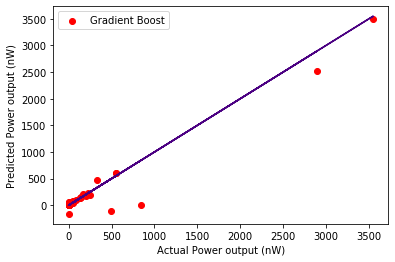

In [76]:
import matplotlib.pyplot as plt
g=plt.scatter(y_i, y_igb, color = "red", label="Gradient Boost")
g.axes.set_xlabel('Actual Power output (nW)')
g.axes.set_ylabel('Predicted Power output (nW)')
plt.plot(y_i, y_i, color = "indigo")
plt.legend()

#### 2. XG Boost 

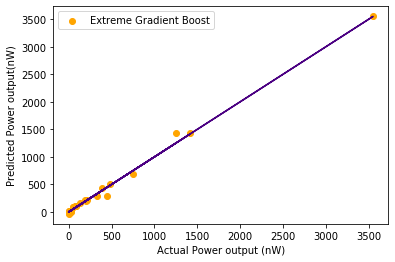

In [90]:
import matplotlib.pyplot as plt
g=plt.scatter(y_i, y_ixg, color = "orange", label="Extreme Gradient Boost")
g.axes.set_xlabel('Actual Power output (nW)')
g.axes.set_ylabel('Predicted Power output(nW)')
plt.plot(y_i, y_i, color = "indigo")
plt.legend()

### Real Time Power Prediction

In [95]:
df_test =pd.read_csv('test.csv')
#df_test

In [96]:
import pandas as pd

X = df.drop('Power(nWatts)',axis='columns')
y = df['Power(nWatts)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

df_y_test = pd.DataFrame(y_test)
df_ytest = pd.DataFrame(scaler.fit_transform(df_y_test),
                        columns=['Power(nWatts)'])
df_X_result = pd.DataFrame(X)
df_Xresult= pd.DataFrame(scaler.fit_transform(df_X_train),
                        columns=['Length(mm)','Width(um)', 'Frequency(MHz)'])

df_X_test = pd.DataFrame(X_test)
df_Xtest =pd.DataFrame(scaler.fit_transform(df_X_test),
                        columns=['Length(mm)','Width(um)', 'Frequency(MHz)'])
df_y_train = pd.DataFrame(y_train)
df_ytrain =pd.DataFrame(scaler.fit_transform(df_y_train),
                        columns=['Power(nWatts)'])



In [103]:
import pandas as pd

from scipy.stats import pearsonr
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 


def fit(length, width, Bandwidth):
    df_test =pd.read_csv('Data_lwf.csv')
    df_test=df_test.drop('Application', axis='columns')
    df_test.loc[0,'Length(mm)']= length
    df_test.loc[0,'Width(um)'] = width
    df_test.loc[0, 'Frequency(MHz)'] = Bandwidth
    X = df_test.drop('Power(nWatts)',axis='columns')
    y = df_test['Power(nWatts)']

    df_X_result = pd.DataFrame(X)
    df_Xresult= pd.DataFrame(scaler.fit_transform(df_X_result),
                        columns=['Length(mm)','Width(um)', 'Frequency(MHz)'])
    df_y_result = pd.DataFrame(y)
    df_yresult = pd.DataFrame(scaler.fit_transform(df_y_result),
                       columns=['Power(nWatts)'])                                 
    y_out = model_gb.predict(df_Xresult)
    df_test.loc[:, 'Power(nWatts)'] = pd.DataFrame(y_out)
    y_i=scaler.inverse_transform(pd.DataFrame(y_out))
    return y_i[0]  

length = float(input("Enter the length of interconnect in mm: "))
print("Length of Interconnect:", length,"mm")

width = float(input("Enter the Width of interconnect in um: "))
print("Width of Interconnect:", width,"um")

Bandwidth = float(input("Enter the Bandwidth of operation of interconnect in MHZ: "))
print("Bandwidth of operation of Interconnect:", Bandwidth, "MHz")


Power = fit(length, width, Bandwidth)
print("Power Dissipated in the Interconnect:", Power, "nWatts")


Enter the length of interconnect in mm: 1
Length of Interconnect: 1.0 mm
Enter the Width of interconnect in um: 1
Width of Interconnect: 1.0 um
Enter the Bandwidth of operation of interconnect in MHZ: 96
Bandwidth of operation of Interconnect: 96.0 MHz
Power Dissipated in the Interconnect: [68.16971586] nWatts


In [104]:
import pandas as pd

from scipy.stats import pearsonr
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 


def fit(length, width, Bandwidth):
    df_test =pd.read_csv('Data_lwf.csv')
    df_test=df_test.drop('Application', axis='columns')
    df_test.loc[0,'Length(mm)']= length
    df_test.loc[0,'Width(um)'] = width
    df_test.loc[0, 'Frequency(MHz)'] = Bandwidth
    X = df_test.drop('Power(nWatts)',axis='columns')
    y = df_test['Power(nWatts)']

    df_X_result = pd.DataFrame(X)
    df_Xresult= pd.DataFrame(scaler.fit_transform(df_X_result),
                        columns=['Length(mm)','Width(um)', 'Frequency(MHz)'])
    df_y_result = pd.DataFrame(y)
    df_yresult = pd.DataFrame(scaler.fit_transform(df_y_result),
                       columns=['Power(nWatts)'])                                 
    y_out = model_xg.predict(df_Xresult)
    df_test.loc[:, 'Power(nWatts)'] = pd.DataFrame(y_out)
    y_i=scaler.inverse_transform(pd.DataFrame(y_out))
    return y_i[0]  

length = float(input("Enter the length of interconnect in mm: "))
print("Length of Interconnect:", length,"mm")

width = float(input("Enter the Width of interconnect in um: "))
print("Width of Interconnect:", width,"um")

Bandwidth = float(input("Enter the Bandwidth of operation of interconnect in MHZ: "))
print("Bandwidth of operation of Interconnect:", Bandwidth, "MHz")


Power = fit(length, width, Bandwidth)
print("Power Dissipated in the Interconnect:", Power, "nWatts")


Enter the length of interconnect in mm: 1
Length of Interconnect: 1.0 mm
Enter the Width of interconnect in um: 1
Width of Interconnect: 1.0 um
Enter the Bandwidth of operation of interconnect in MHZ: 96
Bandwidth of operation of Interconnect: 96.0 MHz
Power Dissipated in the Interconnect: [94.47354] nWatts
